In [1]:
import pandas as pd
import glob
import random
import numpy as np
import pickle

import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import gensim
from gensim import corpora

In [2]:
np.random.seed = 42
random.seed = 42

In [ ]:
path = '../data/'

## 후보/연도별로 연설 합치기

In [ ]:
df = None
for file in glob.glob(path+'to_preprocess/*'):
    df_curr = pd.read_csv(file, index_col=0)
    df_curr["Year"] = int(file.split("\\")[-1][0:4])
    if df is None:
        df = df_curr
    else:
        df = pd.concat([df,df_curr])


#ValueError: invalid literal for int() with base 10: 'Nomi' 나와도 정상(맨마지막 파일이라 실질 영향 X고 미포함한게 맞음)

In [ ]:
df

## 연도 분포 확인

In [ ]:


fig, ax = plt.subplots()

df.groupby("Year")["Year"].value_counts().plot.bar(ax=ax)
# ax.hist(df["Year"], bins=range(1920,2024,4))

## 후보별 분포 확인

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

df.groupby("name")["name"].value_counts().plot.bar(ax=ax)
# ax.hist(df["name"])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
df["joined_speech"] = df["speech"].apply(lambda l: ' '.join(ast.literal_eval(l)))

## 길이 분포 확인

In [ ]:
fig, ax = plt.subplots()

ax.hist(df["joined_speech"].apply(lambda l: len(l.split(' '))))

In [ ]:
df.info()

In [ ]:

ast.literal_eval(df["speech"].values[0])

## WordCloud

In [ ]:
# !conda install wordcloud -y


df_test = pd.read_csv(path+'orig/2020_Trump_speech.csv', index_col=0)

speeches = list(map(lambda l: ' '.join(ast.literal_eval(l)), df_test["speech"].values))



speeches_processed = list()
for word in speeches:
    if word not in stop_words_list:
        speeches_processed.append(word)

speeches_combined = ' '.join(speeches_processed)

In [ ]:
wordcloud = WordCloud(
    background_color = 'black',
    width = 1000, height = 500).generate(speeches_combined)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

In [ ]:
df_test = pd.read_csv(path+'to_preprocess/2020_Biden_speech_edited.csv', index_col=0)

In [ ]:
speeches = list(map(lambda l: ' '.join(ast.literal_eval(l)), df_test["speech"].values))

speeches_combined = ' '.join(speeches)

speeches_processed = list()
for word in speeches:
    if word not in stop_words_list:
        speeches_processed.append(word)

speeches_combined = ' '.join(speeches_processed)

In [ ]:
wordcloud = WordCloud(
    background_color = 'black',
    width = 1000, height = 500).generate(speeches_combined)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

## LDA

In [ ]:

lambda x: re.sub('[,\.!?]','',x)

lambda x: x.lower()



In [ ]:
import gensim
from gensim_utils import simple_preprocess
import nltk


In [ ]:
# !conda install nltk -y

# nltk.download('stopwords')
# nltk.download("punkt")
stop_words_list = stopwords.words('english')

In [ ]:
len(stop_words_list)

In [ ]:
df["speech_whole"] = df["speech"].apply(lambda l: ' '.join(ast.literal_eval(l)))
# ast.literal_eval(df["speech"].values[0])

In [ ]:
def filter_stopwords(token_list):
    filtered_list = list()
    for token in token_list:
        if token not in stop_words_list:
            filtered_list.append(token)
    return filtered_list

In [ ]:
def filter_externals(string):
    # externals_list = ['[applause]', '(applause)']
    # for external in externals_list:
    #     string = string.replace(external, '')
    string = re.sub('\s*\[[^]]*\]', '', string)
    string = re.sub('\s*\([^)]*\)', '', string)
    string = re.sub('\s*\([^]]*\]', '', string)
    string = re.sub('\s*\[[^)]*\)', '', string)
    return string

In [ ]:
def filter_nonwords(string):
    out = string
    out = re.sub('[-–—–;\.!?]', ' ', out)
    out = re.sub('[,"\'`]','', out)
    out = re.sub('[^a-zA-Z0-9\s\-_./]','', out)
    out = out.lower()
    return out

In [ ]:
# 청중 호응 부분 제거

df["speech_processed"] = df["speech_whole"].apply(filter_externals)

In [ ]:
# for idx, speech in enumerate(df["speech_processed"].values):
#     found_idx = speech.find("applause")
#     if found_idx != -1:
#         print(speech[found_idx-50:found_idx+15])

In [ ]:
#문법요소 제거

df["speech_processed"] = df["speech_processed"].apply(filter_nonwords)

In [ ]:
#다른 토큰화 방식 사용할 경우
# from nltk.tokenize.treebank import TreebankWordTokenizer
# t = TreebankWordTokenizer()

# df["speech_processed"] = df["speech_processed"].apply(t.tokenize)

df["speech_processed"] = df["speech_processed"].apply(word_tokenize)

In [ ]:
#기본 불용어 제거

df["speech_processed"] = df["speech_processed"].apply(filter_stopwords)

In [ ]:
# !conda install gensim -y

dictionary = corpora.Dictionary(df["speech_processed"])

corpus = [dictionary.doc2bow(text) for text in df["speech_processed"]]

In [ ]:
# 잘못된 단어 있나 확인
# words = list(dictionary.values())
# words.sort(key=lambda x:len(x), reverse=True)
# words

In [ ]:
n_topics = 15
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=15, random_state=42)
topics = lda_model.print_topics(num_words=5)

for topic in topics:
    print(topic)

In [ ]:
n_topics = 20
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=15, random_state=42)
topics = lda_model.print_topics(num_words=5)

for topic in topics:
    print(topic)

In [ ]:
topics = lda_model.print_topics(num_words=10)

for topic in topics:
    print(topic)

In [ ]:
for i, topic_list in enumerate(lda_model[corpus]):
    print(i,'번째 문서의 topic 비율은',topic_list)

## Calculate TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


v = TfidfVectorizer(use_idf=True)


x = v.fit_transform(df["speech_processed"].apply(lambda x: ' '.join(x)))

In [ ]:
v.vocabulary_

In [ ]:
x.mean(axis=0)
# x.shape

In [ ]:
from tqdm import tqdm
tfidf_list = list()
for key, val in tqdm(v.vocabulary_.items()):
    tfidf_list.append((key, x.mean(axis=0)[0,val]))

In [ ]:
len(tfidf_list)

In [ ]:
tfidf_list.sort(key=lambda x: x[1], reverse=True)

In [ ]:
tfidf_list[0:10]

In [ ]:
tfidf_list[-10:]

## Calculate IDF

In [ ]:
idf = v.idf_

from tqdm import tqdm
idf_list = list()
for key, val in tqdm(v.vocabulary_.items()):
    idf_list.append((key, idf[val]))

idf_list.sort(key=lambda x: x[1], reverse=True)

In [ ]:
idf_list[-50:]

In [ ]:
# import pickle
# with open("./data/idflist","wb") as fp:
#     pickle.dump(idf_list, fp)

## 2차 정제본

In [3]:
with open(path+"idflist","rb") as fp:
    idf_list = pickle.load(fp)[-50:]

# len(filter_words)

In [4]:
filter_words = list()
for idf in idf_list[-50:]:
    filter_words.append(idf[0])

In [14]:
idf_list[-50:]

[('take', 1.411317026676103),
 ('year', 1.4068125145549983),
 ('americans', 1.4041195147228065),
 ('better', 1.4018808748803493),
 ('dont', 1.4005400925565843),
 ('also', 1.3996472353544118),
 ('need', 1.3960837571960234),
 ('right', 1.3912046168890075),
 ('back', 1.381517178733318),
 ('state', 1.3767084262974345),
 ('thank', 1.3710550083263349),
 ('help', 1.3680240469238998),
 ('said', 1.3671597426350046),
 ('go', 1.3650022444949834),
 ('get', 1.361130439270998),
 ('government', 1.357701374616481),
 ('much', 1.3419931339857256),
 ('think', 1.3411510286728034),
 ('work', 1.3394689424898185),
 ('like', 1.3331861993103233),
 ('believe', 1.3298514734188702),
 ('last', 1.322801890004607),
 ('many', 1.3162120803255513),
 ('come', 1.3158016555301328),
 ('good', 1.3153913991141222),
 ('well', 1.3121153929082214),
 ('say', 1.309665412099237),
 ('way', 1.309665412099237),
 ('going', 1.29228070096972),
 ('first', 1.2918799796660208),
 ('world', 1.2902786982990468),
 ('united', 1.2759813935982225

In [17]:
filter_words = list()
for idf in idf_list[-50:]:
    filter_words.append(idf[0])

filter_val = list()
for idf in idf_list[-50:]:
    filter_val.append(idf[1])

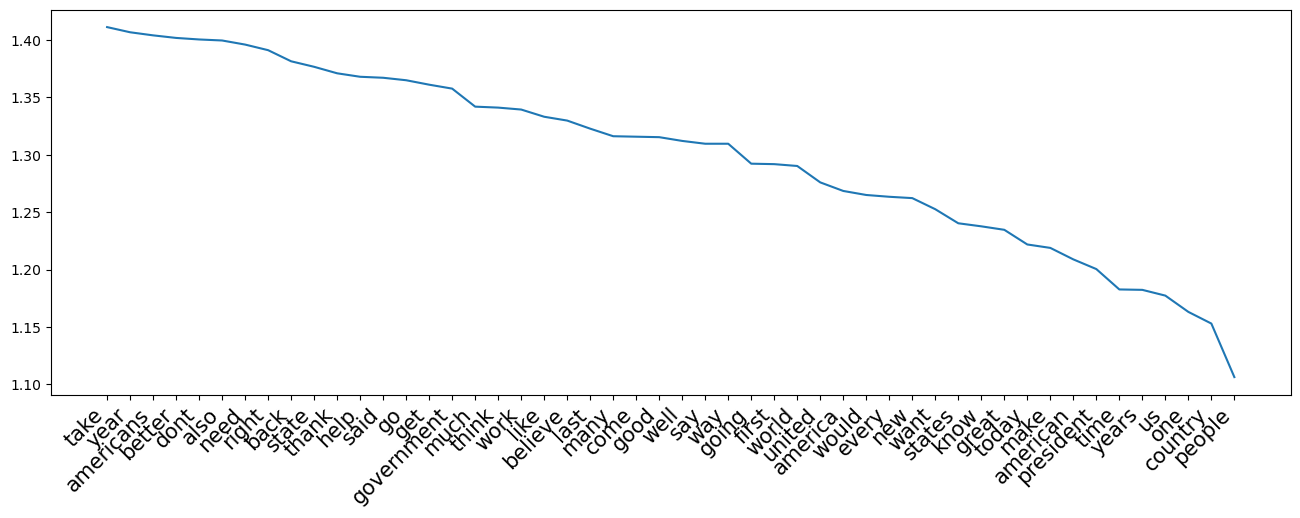

In [31]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(filter_words, filter_val)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15)
plt.show()

In [5]:
filter_words

['take',
 'year',
 'americans',
 'better',
 'dont',
 'also',
 'need',
 'right',
 'back',
 'state',
 'thank',
 'help',
 'said',
 'go',
 'get',
 'government',
 'much',
 'think',
 'work',
 'like',
 'believe',
 'last',
 'many',
 'come',
 'good',
 'well',
 'say',
 'way',
 'going',
 'first',
 'world',
 'united',
 'america',
 'would',
 'every',
 'new',
 'want',
 'states',
 'know',
 'great',
 'today',
 'make',
 'american',
 'president',
 'time',
 'years',
 'us',
 'one',
 'country',
 'people']

In [ ]:
import ast
def filter_lowidf(token_list):
    token_list = ast.literal_eval(token_list)
    filtered_list = list()

    for token in token_list:
        if token not in filter_words:
            filtered_list.append(token)
    return filtered_list

In [ ]:
df["speech_processed2"] = df["speech_processed"].apply(filter_lowidf)

In [ ]:
df.to_csv(path+"speech_combined.csv")

## 2차 정제본으로 LDA

In [ ]:
df= pd.read_csv(path+"text_features.csv", index_col=0)
df_2024 = pd.read_csv(path+"2024_text_features.csv", index_col=0)

In [ ]:
df["speech_processed2"] = df["speech_processed2"].apply(ast.literal_eval)

In [ ]:
df_2024["speech_processed2"] = df_2024["speech_processed2"].apply(ast.literal_eval)

In [ ]:
# !conda install gensim -y

dictionary = corpora.Dictionary(df["speech_processed2"])

corpus = [dictionary.doc2bow(text) for text in df["speech_processed2"]]

In [ ]:
n_topics = 20
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=15, random_state=42)
topics = lda_model.print_topics(num_words=5)

for topic in topics:
    print(topic)

## Ablation: LDA 기반 중요도 피쳐

In [3]:
df_all = pd.read_csv(path+"debate_combined_ver2.csv", index_col=0)
df_2024 = pd.read_csv(path+"2024_combined.csv", index_col=0)

In [ ]:
# df_all["speech_processed2"] = df_all["speech_processed2"].apply(ast.literal_eval)
# df_2024["speech_processed2"] = df_2024["speech_processed2"].apply(ast.literal_eval)

In [5]:
# !conda install gensim -y

dictionary = corpora.Dictionary(df_all["speech_processed2"].apply(ast.literal_eval))

corpus = [dictionary.doc2bow(text) for text in df_all["speech_processed2"].apply(ast.literal_eval)]

In [6]:
n_topics = 20
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=15, random_state=42)
topics = lda_model.print_topics(num_words=10)

for topic in topics:
    print(topic)

(0, '0.010*"peace" + 0.009*"must" + 0.008*"things" + 0.007*"friends" + 0.006*"war" + 0.006*"freedom" + 0.006*"tell" + 0.006*"thats" + 0.005*"progress" + 0.005*"strength"')
(1, '0.014*"energy" + 0.012*"health" + 0.010*"care" + 0.010*"oil" + 0.008*"jobs" + 0.006*"economy" + 0.006*"workers" + 0.005*"plan" + 0.004*"costs" + 0.004*"families"')
(2, '0.010*"thats" + 0.009*"im" + 0.006*"got" + 0.006*"theyre" + 0.005*"trump" + 0.005*"see" + 0.005*"really" + 0.005*"lot" + 0.005*"care" + 0.004*"look"')
(3, '0.008*"federal" + 0.007*"must" + 0.005*"economic" + 0.005*"national" + 0.005*"public" + 0.005*"business" + 0.005*"upon" + 0.004*"administration" + 0.004*"system" + 0.004*"nation"')
(4, '0.011*"let" + 0.010*"congress" + 0.009*"next" + 0.008*"inflation" + 0.007*"2" + 0.006*"percent" + 0.006*"peace" + 0.006*"months" + 0.006*"tax" + 0.005*"4"')
(5, '0.014*"war" + 0.013*"must" + 0.006*"iraq" + 0.005*"security" + 0.005*"military" + 0.004*"never" + 0.003*"nation" + 0.003*"veterans" + 0.003*"americas"

In [7]:
topics = lda_model.print_topics(num_words=2)
len(topics)

20

In [8]:
# words = list(dictionary.values())
# words.sort(key=lambda x:len(x), reverse=True)
# words

In [9]:
topics_refined = dict()
# topics_refined["environment"] = []
topics_refined["economy"] = [1,3,4,8]
# topics_refined["diplomacy"] = []
# topics_refined["immigration"] = []
topics_refined["justice"] = [7]
topics_refined["education"] = [6]
# topics_refined["Healthcare"] = []
topics_refined["military"] = [5,19]
topics_refined["ideal"] = [0,13]

In [10]:
inference = lda_model.inference(corpus)
topic_distr,_ = inference

In [11]:
for topic, columns in topics_refined.items():
  # print(topic_distr[:,columns])
  df_all[f"{topic}_importance"] = topic_distr[:,columns].sum(axis=1)

In [13]:
dictionary_2024 = corpora.Dictionary(df_2024["speech_processed2"].apply(ast.literal_eval))

corpus_2024 = [dictionary.doc2bow(text) for text in df_2024["speech_processed2"].apply(ast.literal_eval)
]
inference_2024 = lda_model.inference(corpus_2024)
topic_distr_2024,_ = inference_2024

In [14]:
for topic, columns in topics_refined.items():
  # print(topic_distr[:,columns])
  df_2024[f"{topic}_importance"] = topic_distr_2024[:,columns].sum(axis=1)

In [15]:
df_all = df_all.drop("speech_processed",axis=1)
df_2024 = df_2024.drop("speech_processed",axis=1)

In [16]:
df_all.to_csv(path+'text_features_LDA.csv')
df_2024.to_csv(path+'2024_text_features_LDA.csv')

In [ ]:
df_all.iloc[34]

In [ ]:
import pandas as pd
df_all = pd.read_csv(path+'text_features_LDA.csv', index_col=0)

In [ ]:
df_all.iloc[34]

In [ ]:
topic_distr[:,[1,2]]

In [ ]:
for i, topic_list in enumerate(lda_model[corpus]):
    print(i,'번째 문서의 topic 비율은',topic_list)